<a href="https://colab.research.google.com/github/scharu07/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
directory_path='/content/drive/MyDrive/Alma Better/Module 1 :Python for Data Science/Capstone Project : Hotel Booking Analysis/'
file_name='Hotel Bookings.csv'
hotel_booking_df=pd.read_csv(directory_path+file_name)

# Data Inspection

In [25]:
df=hotel_booking_df.copy()

In [26]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [27]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [35]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
count,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926,793
top,City Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21 00:00:00,2015-12-05 00:00:00
freq,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461,448
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-17 00:00:00,2015-07-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-14 00:00:00,2017-08-31 00:00:00
mean,NaN,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# ***Data Cleanig***

## Updating Appropriate Data Types of existing columns

**--** Reservation Status Date is an object type but it can converted to datetime column for better analysis

In [30]:
df.reservation_status_date= pd.to_datetime(df['reservation_status_date'])

**--** arrival_date_month categorical data type can be updated to numeric values of months

In [31]:
df['arrival_date_month']=df['arrival_date_month'].map({'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07'
                                                       ,'August':'08','September':'09','October':'10','November':'11','December':'12'})

In [32]:
df.arrival_date_month=df.arrival_date_month.astype(int)

**--** A new columnn can be introduced as Arrival date using following columns:
*   arrival_date_year
*   arrival_date_month
*   arrival_date_day_of_month





In [33]:
df['arrival_date']=df.apply(lambda x: datetime(x['arrival_date_year'],x['arrival_date_month'],x['arrival_date_day_of_month']),axis=1)

## Dealing with missing values

In [40]:
def Find_Null_Values(df):
  '''This method will return columns with Np.NAN values &
  takes dataframe as an argument'''
  
  columns= df.columns.tolist()
  Nan_Columns=[]
  for i in columns:
    if(len(df[df[i].isna()])) >0:
      Nan_Columns.append(i)
  return Nan_Columns

In [41]:
Find_Null_Values(df)

['children', 'country', 'agent', 'company']

### Removing NAN values from Children Column

In [49]:
#Mode
mode=stats.mode(df.children)  
print("Mode of Children column in Hotel Booking DataFrame is ",int(mode.mode))

#Median
median=np.median(df.children)  
print("Median of Children column in Hotel Booking DataFrame is ",median)

#Mean
mean=np.mean(df.children)  
print("Mean of Children column in Hotel Booking DataFrame is ",mean)

Mode of Children column in Hotel Booking DataFrame is  0
Median of Children column in Hotel Booking DataFrame is  nan
Mean of Children column in Hotel Booking DataFrame is  0.10388990333874994


In [53]:
df.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
#Number of bookings made for Adults 2 & 3
No_of_children_of_Adults= df[['adults','children']].value_counts().reset_index(name='Count')
No_of_children_of_Adults[(No_of_children_of_Adults.adults==2) | (No_of_children_of_Adults.adults==3)]

,adults,children,Count
0,2,0.0,82278
2,3,0.0,5675
3,2,1.0,4089
4,2,2.0,3248
5,3,1.0,487
10,2,3.0,61
12,3,2.0,39
23,2,10.0,1


Filling Null values in Children with Mode as Children is a discrete data

**Additionally,**

 It is observed that Adults= 2 & 3 mostly comes with 0 child

 Probability (X=0 children with 2 adults) = count(X)/Total count of 2 adults = 82278/89677 = 91% 

 Probability (X=0 children with 3 adults) = count(X)/Total count of 3 adults = 5675/6201 = 91% 

 Hence, we can replace NAN value with mode 0 in children column where adults=2 and 3


In [54]:
df.children.fillna(int(mode.mode),inplace=True)

In [87]:
df.children=df.children.astype('int')

In [55]:
Find_Null_Values(df)

['country', 'agent', 'company']

### Removing NAN values from column Country 

In [72]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BDI        1
NPL        1
NIC        1
NAM        1
MMR        1
Name: country, Length: 177, dtype: int64

In [73]:
df[df.country.isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
30,Resort Hotel,0,118,2015,7,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15,2015-07-01
4127,Resort Hotel,1,0,2016,2,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15,2016-02-15
7092,Resort Hotel,1,8,2016,7,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20,2016-07-21
7860,Resort Hotel,1,39,2016,8,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22,2016-08-30
8779,Resort Hotel,1,0,2016,10,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,4,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10,2017-04-10
65909,City Hotel,1,0,2017,4,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10,2017-04-10
65910,City Hotel,1,0,2017,4,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10,2017-04-10
80830,City Hotel,0,4,2015,11,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26,2015-11-23


In [74]:
mode=stats.mode(df.country)
print("Mode of Categorical Column Country is",str(mode.mode))

Mode of Categorical Column Country is ['PRT']


In [75]:
df_country=df.country.value_counts().rename_axis('Country').reset_index(name='counts')
df_country.head()

,Country,counts
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287


Around 40% values in Country Column has 'PRT' value. Hence, replacing the NaN values with Mode i.e 'PRT'

In [76]:
df.country.replace(to_replace=np.NaN, value='PRT',inplace=True)

In [77]:
Find_Null_Values(df)

['agent', 'company']

### Replacing NaN values from Columns : Agent and Company

In Case of Agent Column, almost 14% values are missing and only 30% of non null values has value 9. 

And In case of Company Column, More than 90% values are missing

Hence, Imputing these float values with 0

In [89]:
df.agent.replace(to_replace=np.NaN, value=0,inplace=True)
df.company.replace(to_replace=np.NaN, value=0,inplace=True)

In [90]:
#Converting DataType to int which was float due to np.NAN value
df.agent=df.agent.astype('int')
df.company=df.company.astype('int')

In [91]:
Find_Null_Values(df)

[]

**UPTIL NOW, WE HAVE DEALT WITH MISSING DATA**








# Percentage of booking made year wise

In [ ]:
df.arrival_date_year.unique()

array([2015, 2016, 2017])

In [ ]:
df_yearly_bookings=df.arrival_date_year.value_counts(normalize=True).rename_axis('Year').reset_index(name='No Of Bookings')
df_yearly_bookings['No Of Bookings']=df_yearly_bookings['No Of Bookings']*100
df_yearly_bookings

,Year,No Of Bookings
0,2016,47.497278
1,2017,34.079069
2,2015,18.423654


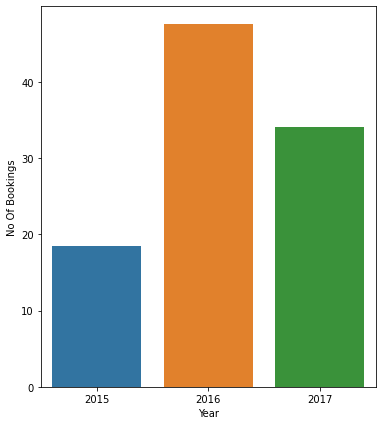

In [ ]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_yearly_bookings.Year,y=df_yearly_bookings['No Of Bookings'])
plt.show()

### **=>** 47% Bookings are made in the year 2016

## Monthly Booking Analysis / Year

In [ ]:
df_monthly_analysis=df.groupby(['arrival_date_month','arrival_date_year'])['arrival_date_month'].count().unstack()
df_monthly_analysis.replace(to_replace=np.NaN,value=0)

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,0.0,5428.0,5661.0
August,3889.0,5063.0,4925.0
December,2920.0,3860.0,0.0
February,0.0,3891.0,4177.0
January,0.0,2248.0,3681.0
July,2776.0,4572.0,5313.0
June,0.0,5292.0,5647.0
March,0.0,4824.0,4970.0
May,0.0,5478.0,6313.0


Text(0.5, 0, 'Months')

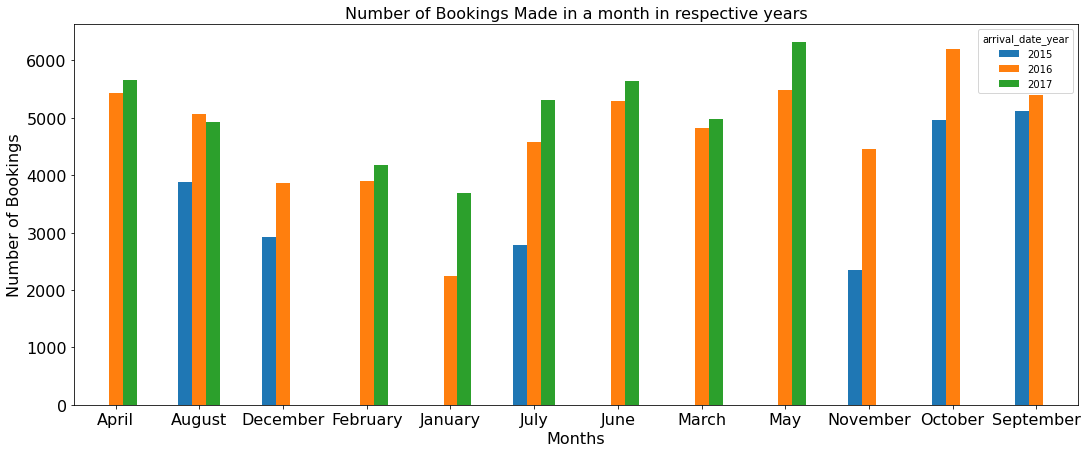

In [ ]:
df_monthly_analysis.plot.bar(rot=0,figsize=(18,7),fontsize=16,orientation='vertical')
plt.title('Number of Bookings Made in a month in respective years',fontdict={'fontsize':16})
plt.ylabel('Number of Bookings',fontdict={'fontsize':16})
plt.xlabel('Months',fontdict={'fontsize':16})

#### **Conclusion** : People have booked the hotels in the month of July and August in all three years.
#### 1. In the Month of July Count of People are increasing rapidly
#### 2. In the month of August , It increased in 2016 and slightly decreased in 2017
#### 3. Maximum Bookings in 2015,2016,2017 is in the month September ,October, May respectively.

## Bookings Pattern through the year

In [ ]:
df_monthly=df.arrival_date_month.value_counts(normalize=True).rename_axis('Month').reset_index(name='Bookings')
df_monthly.Bookings=df_monthly.Bookings*100
df_monthly

,Month,Bookings
0,August,11.623252
1,July,10.604741
2,May,9.876037
3,October,9.347517
4,April,9.288048
5,June,9.162409
6,September,8.801407
7,March,8.203367
8,February,6.757685
9,November,5.690594


Text(0.5, 1.0, 'Number of Bookings Made across months')

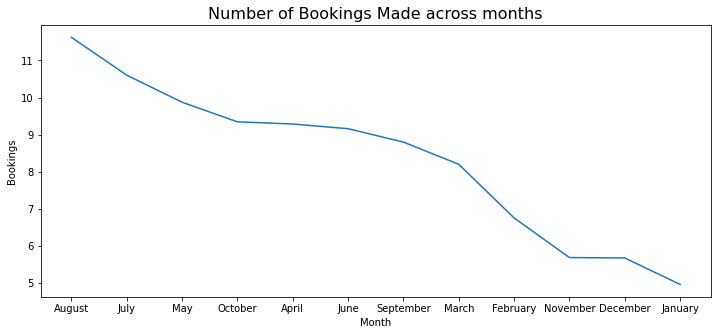

In [ ]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.lineplot(x=df_monthly.Month,y=df_monthly.Bookings,data=df_monthly)
plt.title('Number of Bookings Made across months',fontdict={'fontsize':16})

# Which Country People Booked the hotel most

In [ ]:
df_country=df.country.value_counts(normalize=True).rename_axis('Country').reset_index(name='No_of_People')
df_country1=df_country[df_country.No_of_People>0.01]
df_country1.No_of_People=df_country1.No_of_People*100
df_country1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Country,No_of_People
0,PRT,41.107295
1,GBR,10.159142
2,FRA,8.723511
3,ESP,7.176480
4,DEU,6.103526
5,ITA,3.154368
6,IRL,2.826870
7,BEL,1.961638
8,BRA,1.862803
9,NLD,1.762292


Text(0.5, 0, 'Countries')

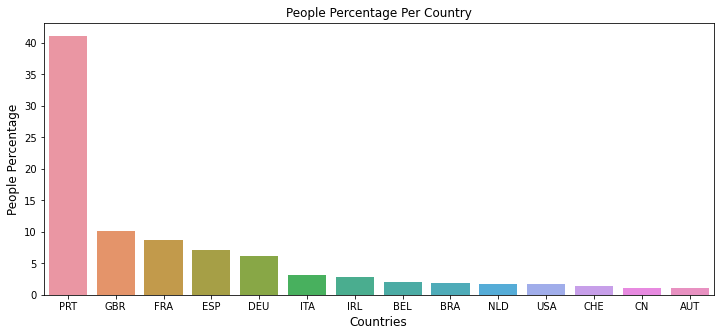

In [ ]:
sns.barplot(x=df_country1.Country,y=df_country1.No_of_People,data=df_country1)
plt.title('People Percentage Per Country',fontdict={'fontsize':12})
plt.ylabel('People Percentage',fontdict={'fontsize':12})
plt.xlabel('Countries',fontdict={'fontsize':12})

## More than 40% visitors are from PRT

## In which Month People from PRT are visiting the most

In [ ]:
df_monthly_PRT=df.arrival_date_month[df.country=='PRT'].value_counts(normalize=True).rename_axis('Month').reset_index(name='Count')
df_monthly_PRT.Count=df_monthly_PRT.Count*100
df_monthly_PRT

,Month,Count
0,August,10.544439
1,October,10.132850
2,July,10.061535
3,September,9.800725
4,June,8.938832
5,May,8.820653
6,April,8.309222
7,March,7.704063
8,February,7.583846
9,December,6.336852


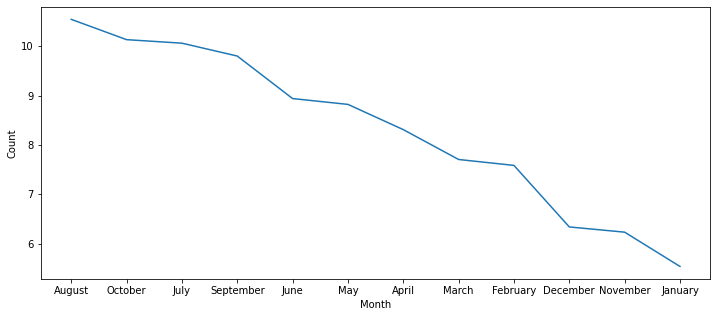

In [ ]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.lineplot(x=df_monthly_PRT.Month,y=df_monthly_PRT.Count,data=df_monthly_PRT)

### Most of the Visitors from PRT are not travelling during Winter Season i.e during the month February, December , November and January

# Detailed Analysis about kind of hotels

In [ ]:
# df_hotelType
df_Hotel_type=df.hotel.value_counts().rename_axis('Hotel_Type').reset_index(name='Count')
df_Hotel_type

,Hotel_Type,Count
0,City Hotel,79330
1,Resort Hotel,40060


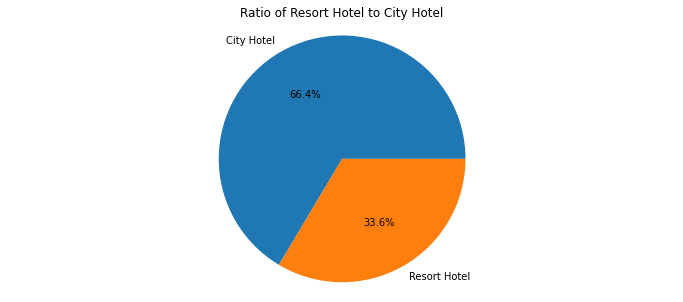

In [ ]:
plt.pie(df_Hotel_type.Count,labels=df_Hotel_type.Hotel_Type,autopct='%1.1f%%')
plt.title('Ratio of Resort Hotel to City Hotel')
plt.axis('equal')
plt.show()

## Canceled and Non Canceled Resort and City Hotels

In [ ]:
df_canceled_hotels=df.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
df_canceled_hotels

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


Text(0.5, 1.0, 'Canceled vs Non Canceled Hotels')

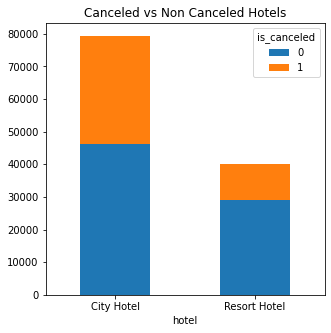

In [ ]:
df_canceled_hotels.plot.bar(rot=0,figsize=(5,5),fontsize=10,stacked=True)
plt.title('Canceled vs Non Canceled Hotels')

### Lead Time Analysis

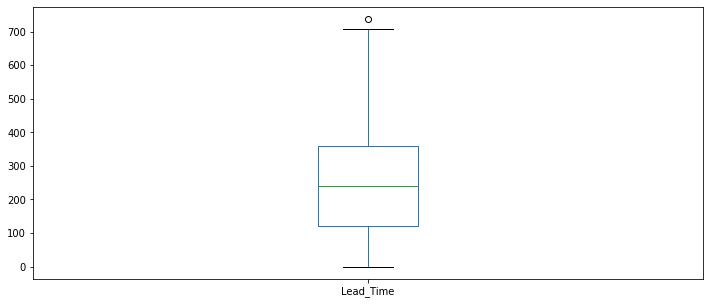

In [ ]:
df_leadtime=pd.DataFrame(df.lead_time.unique()).reset_index()
df_leadtime.rename(columns={0:'Lead_Time'},inplace=True)
df_leadtime.Lead_Time.plot(kind='box')
# df_leadtime

In [ ]:
print(df_leadtime.Lead_Time.quantile(0.75))
print(df_leadtime.Lead_Time.quantile(0.50))
print(df_leadtime.Lead_Time.quantile(0.25))

358.5
239.0
119.5


In [ ]:
# df_leadtime=df[['lead_time','adr']][(df.lead_time>=119.5) & (df.lead_time<=358.5) & (df.is_canceled==0)].value_counts().reset_index(name='Count')
# # df_leadtime[df_leadtime.is_canceled==0]
# # df_leadtime=df_leadtime.groupby('lead_time').agg({"adr":"mean",'Count':'sum'}).reset_index()
# df_leadtime
df_leadtime=df.lead_time[(df.lead_time>=119.5) & (df.lead_time<=358.5) & (df.is_canceled==0)].value_counts().rename_axis('Lead_time').reset_index(name='Count')
df_leadtime

,Lead_time,Count
0,192,217
1,151,213
2,152,212
3,159,211
4,122,203
...,...,...
233,354,5
234,356,4
235,340,4
236,347,3


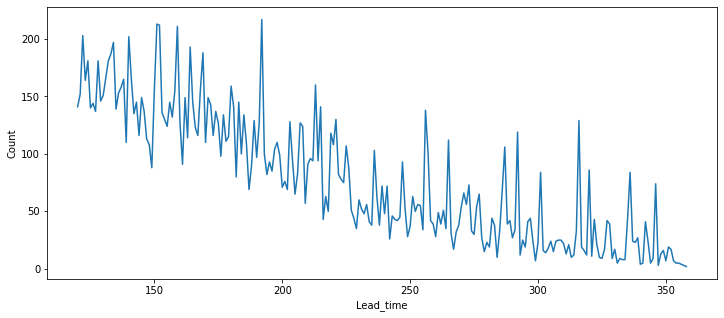

In [ ]:
sns.lineplot(x=df_leadtime.Lead_time,y=df_leadtime.Count,data=df_leadtime)